# Visualización

Ahora que ya tenemos idea de cómo procesar los datos y conocemos más o menos su contenido, podemos empezar a hacer algunas visualizaciones. En general, el flujo de análisis de datos va y viene entre el preproceso, la visualización y el análisis. El tipo de preproceso va ligado a las visualizaciones que queremos hacer y estas van mostrando el camino del análisis, por lo tanto en la vida real uno siempre está yendo y viniendo entre estas etapas.

En este taller vamos a explorar gráficamente los datos y empezarnos a hacer preguntas sobre ellos, preguntas que intentaremos ir respondiendo con nuevas visualizaciones. Para ello vamos a partir de la base de datos que construimos en el taller anterior.

Como siempre, lo primero es importar las librerías que vamos a utlizar

In [6]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from datetime import timedelta, date, datetime

Ahora sí podemos leer los datos.

In [8]:
df = pd.read_pickle("data/datos_covid_ene19.zip")
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_ANTIGENO_BIN,MIGRANTE_BIN,UCI_BIN,DEFUNCION,AÑO_INGRESO,MES_INGRESO,DIA_SEMANA_INGRESO,SEMANA_AÑO_INGRESO,DIA_MES_INGRESO,DIA_AÑO_INGRESO
FECHA_INGRESO,,,,,,,,,,,,,,,,,,,,,
2020-07-06,2022-01-18,z12d63,2,12,CIUDAD DE MÉXICO,2,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,VENUSTIANO CARRANZA,AMBULATORIO,...,0,0,0,0,2020,7,0,28,6,188
2020-09-23,2022-01-18,z13788,1,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,CUAJIMALPA DE MORELOS,AMBULATORIO,...,0,0,0,0,2020,9,2,39,23,267
2020-06-15,2022-01-18,z2b144,2,12,CIUDAD DE MÉXICO,1,MÉXICO,CIUDAD DE MÉXICO,AZCAPOTZALCO,AMBULATORIO,...,0,0,0,0,2020,6,0,25,15,167
2020-12-21,2022-01-18,z526b3,2,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,TLALPAN,AMBULATORIO,...,1,0,0,0,2020,12,0,52,21,356
2020-04-22,2022-01-18,z3d1e2,2,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,AMBULATORIO,...,0,0,0,0,2020,4,2,17,22,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11,2022-01-18,m00073e,2,12,MÉXICO,2,NO ESPECIFICADO,CIUDAD DE MÉXICO,CUAUHTÉMOC,AMBULATORIO,...,1,0,0,0,2021,10,0,41,11,284
2021-10-13,2022-01-18,m030623,2,12,MÉXICO,2,MÉXICO,CIUDAD DE MÉXICO,TLÁHUAC,AMBULATORIO,...,1,0,0,0,2021,10,2,41,13,286
2021-10-13,2022-01-18,m049633,2,12,MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,AMBULATORIO,...,0,0,0,0,2021,10,2,41,13,286


## Curvas epidémicas

Por lo pronto vamos a concentrarnos en la iodea de las _Cuervas Epidémicas_  es decir, la evolución temporal de los casos confirmados y las defunciones. Si consultamos los diccionarios de datos, podemos ver que los casos confirmados para COVID-19 corresponden a 3 categorías de la columna clasificación final:

1. CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA
2. CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN
3. CASO DE SARS-COV-2  CONFIRMADO

mientras que las defunciones corresponden a todos aquellos registros que tengan una fecha de defunción válida, es decir, en nuestros datos preprocesados, todas las fechas válidas.

### Curva de casos confirmados

In [27]:
df.CLASIFICACION_FINAL.unique()

array(['CASO SOSPECHOSO', 'CASO DE SARS-COV-2  CONFIRMADO',
       'NO REALIZADO POR LABORATORIO', 'NEGATIVO A SARS-COV-2',
       'CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA',
       'INVÁLIDO POR LABORATORIO',
       'CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN'],
      dtype=object)

In [28]:
valores_confirmados = ['CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA',
                       'CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN',
                       'CASO DE SARS-COV-2  CONFIRMADO']
confirmados = df.loc[df['CLASIFICACION_FINAL'].isin(valores_confirmados)]
confirmados.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_ANTIGENO_BIN,MIGRANTE_BIN,UCI_BIN,DEFUNCION,AÑO_INGRESO,MES_INGRESO,DIA_SEMANA_INGRESO,SEMANA_AÑO_INGRESO,DIA_MES_INGRESO,DIA_AÑO_INGRESO
FECHA_INGRESO,,,,,,,,,,,,,,,,,,,,,
2020-09-23,2022-01-18,z13788,1,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,CUAJIMALPA DE MORELOS,AMBULATORIO,...,0,0,0,0,2020,9,2,39,23,267
2020-12-21,2022-01-18,z526b3,2,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,TLALPAN,AMBULATORIO,...,1,0,0,0,2020,12,0,52,21,356
2020-04-22,2022-01-18,z3d1e2,2,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,AMBULATORIO,...,0,0,0,0,2020,4,2,17,22,113
2020-10-07,2022-01-18,zz9079,2,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,IZTAPALAPA,AMBULATORIO,...,0,0,0,0,2020,10,2,41,7,281
2020-09-08,2022-01-18,z2770b,1,12,CIUDAD DE MÉXICO,1,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,IZTACALCO,AMBULATORIO,...,0,0,0,0,2020,9,1,37,8,252


Ahora tenemos una tabla con todos los casos confirmados, para hacer una curva epidémica, tenemos que agregar en una escala temporal. Lo más sencillo es primero agragar por día y a partir de ahí podemos construir agregados para cualquier intervalo que queramos.

Para poder construir las curvas epidémicas necesitamos decidir cuáál fecha de todas las disponibles vamos a utilizar para agregar los casos. En este caso, la DGE sugiere utilizar la fecha de inicio de síntomas (`FECHA_SINTOMAS`) para construir la curva de casos confirmados y la de defunción (`FECHA_DEF`) para la curva de defunciones.

Entonces, para construir la curva de confirmados lo primero que tenemos que hacer es indexar el DataFrame por la fecha de inicio de síntomas

In [29]:
confirmados = confirmados.set_index('FECHA_SINTOMAS')
confirmados.index

DatetimeIndex(['2020-09-23', '2020-12-18', '2020-04-20', '2020-10-06',
               '2020-09-03', '2020-10-16', '2020-12-22', '2020-03-03',
               '2020-03-03', '2020-03-03',
               ...
               '2021-09-07', '2021-09-02', '2021-09-21', '2021-09-28',
               '2021-10-06', '2021-10-01', '2021-10-02', '2021-10-03',
               '2021-10-03', '2021-10-03'],
              dtype='datetime64[ns]', name='FECHA_SINTOMAS', length=1109842, freq=None)

Entonces es fácil construir agregados diarios, sólo tenemos que seleccionar qué columnas queremos agregar. Por lo pronto hagamos un conteo sólo de casos confirmados. Para eso sólo tenemos que agrupár el ídice usando una frecuencia diaría y tomar el tamaño de los grupos (de alguna columna, realmente no importa cual). 

In [30]:
confirmados_diarios = (confirmados
                       .groupby(pd.Grouper(freq='D'))[['ID_REGISTRO']] # grupos por dia y seleccionamos 'ID_REGISTRO'
                       .size() # Calculamos el tamaño de cada grupo
                       .reset_index() # Convertimos el resultado (que es una serie) en DataFrame
                       .rename({0:'Confirmados'}, axis=1) # Le damos nombre a la columna que obtenemos
                       )
confirmados_diarios

,FECHA_SINTOMAS,Confirmados
0,2020-02-22,1
1,2020-02-23,1
2,2020-02-24,0
3,2020-02-25,0
4,2020-02-26,0
...,...,...
691,2022-01-13,3829
692,2022-01-14,3068
693,2022-01-15,1860
694,2022-01-16,665


Con estos datos podemos usar [Plotly](https://plotly.com/) para hacer una gráfica interactiva de forma muy sencilla.

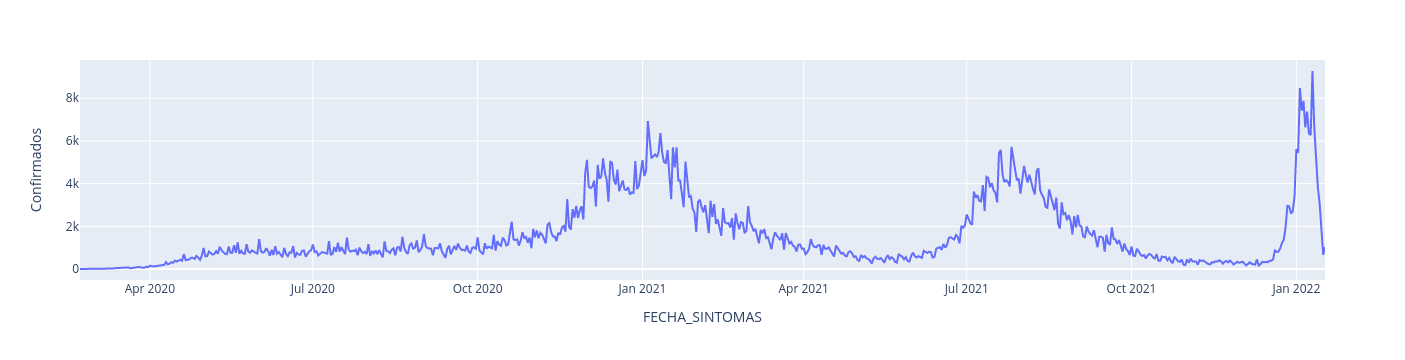

In [31]:
fig = px.line(confirmados_diarios, x='FECHA_SINTOMAS', y="Confirmados")
fig.show()

In [32]:
confirmados_diarios['Media Móvil'] = confirmados_diarios.rolling(window=7).mean()
confirmados_diarios.head(10)

,FECHA_SINTOMAS,Confirmados,Media Móvil
0,2020-02-22,1,NaN
1,2020-02-23,1,NaN
2,2020-02-24,0,NaN
3,2020-02-25,0,NaN
4,2020-02-26,0,NaN
5,2020-02-27,0,NaN
6,2020-02-28,2,0.571429
7,2020-02-29,1,0.571429
8,2020-03-01,4,1.000000
9,2020-03-02,6,1.857143


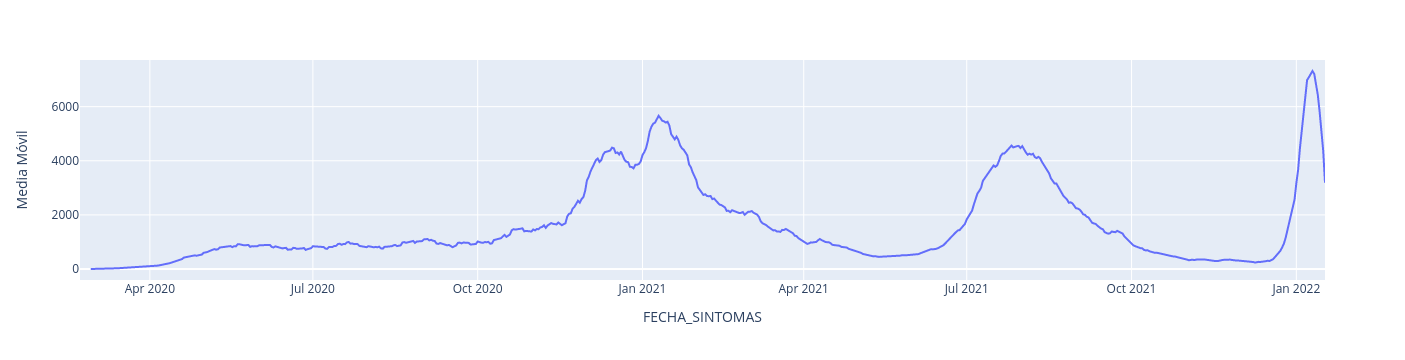

In [33]:
fig = px.line(confirmados_diarios, x='FECHA_SINTOMAS', y='Media Móvil')
fig.show()

Para graficar las dos series en la misma gráfica lo más sencillo es pasar los datos de el formato ancho (en columnas) al formato largo (en filas con una columna que los distinga). Para esto vamos a usar la función [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) de Pandas

In [34]:
 confirmados_diarios = confirmados_diarios.melt(id_vars=['FECHA_SINTOMAS'], value_vars=['Confirmados', 'Media Móvil'])
 confirmados_diarios

,FECHA_SINTOMAS,variable,value
0,2020-02-22,Confirmados,1.000000
1,2020-02-23,Confirmados,1.000000
2,2020-02-24,Confirmados,0.000000
3,2020-02-25,Confirmados,0.000000
4,2020-02-26,Confirmados,0.000000
...,...,...,...
1387,2022-01-13,Media Móvil,6428.142857
1388,2022-01-14,Media Móvil,5812.142857
1389,2022-01-15,Media Móvil,5169.142857
1390,2022-01-16,Media Móvil,4368.000000


Con los datos de esta forma, ahora podemos usar Plotly para graficar ambas variables utilizando como color la columna `variable`

In [35]:
fig = px.line(confirmados_diarios, x='FECHA_SINTOMAS', y='value', color='variable')
fig.show(renderer="colab")

### Curva de defunciones

Ya que construimos la curva de casos confirmados, la de defunciones es exáctamente igual, sólo necesitamos seleccionar al inicio del proceso los renglones que tengan una fecha de defunción válida e indexar por fecha de defunción

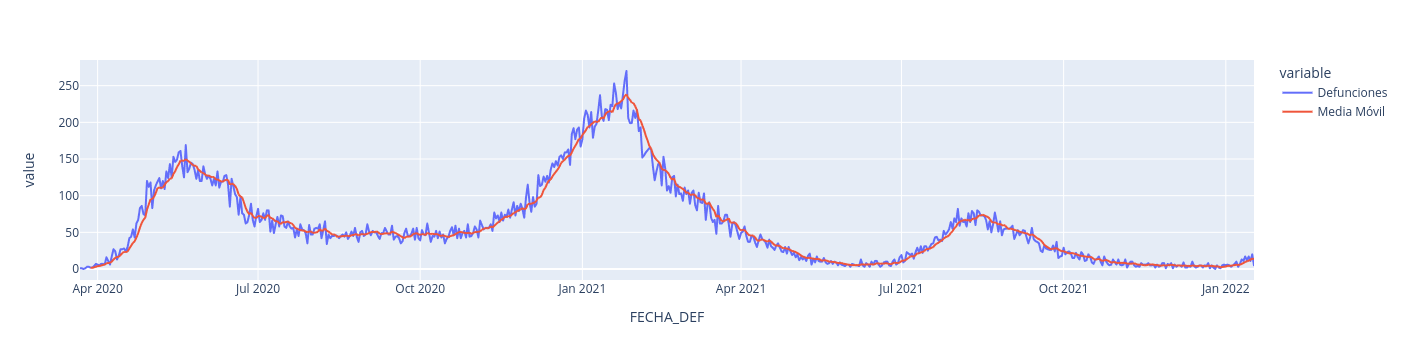

In [36]:
defunciones = confirmados.loc[confirmados['FECHA_DEF'].notnull()] # Seleccionamos los casos con fecha de defunción
defunciones = defunciones.set_index('FECHA_DEF') # indexamos por fecha de defuncióón
defunciones_diarios = (defunciones
                       .groupby(pd.Grouper(freq='D'))[['ID_REGISTRO']] # grupos por dia y seleccionamos 'ID_REGISTRO'
                       .size() # Calculamos el tamaño de cada grupo
                       .reset_index() # Convertimos el resultado (que es una serie) en DataFrame
                       .rename({0:'Defunciones'}, axis=1) # Le damos nombre a la columna que obtenemos
                       )
defunciones_diarios['Media Móvil'] = defunciones_diarios.rolling(window=7).mean()
defunciones_diarios = defunciones_diarios.melt(id_vars=['FECHA_DEF'], value_vars=['Defunciones', 'Media Móvil'])
fig = px.line(defunciones_diarios, x='FECHA_DEF', y='value', color='variable')
fig.show()

### Combinando las dos

La forma más sencilla de combinar ambas gráficas es hacer un Facet Plot, es decir, prodcir dos gráficas ligadas a partir de una sóla base de datos. Para lograr esto necesitamos una estructura un poco diferente, seguimos necesitando una columna que nos distinga los conteos de sus medias móviles, pero además vamos a necesitar otra columna que nos distina el tipo de caso: casos confirmados o defunciones.

Podemos partir de las bases que ya tenemos y simplemente cambiar algunas cosas:

* Agregar una columna que distinga si es Caso o defunción
* Cambiar los valores en las columnas `variable` para que coincidan en ambas series
* Cambiar los nombres de las fechas para que coincidan
* Hacer una base con las dos fuentes 

In [37]:
defunciones_diarios['Tipo'] = 'Defunciones'
defunciones_diarios.loc[defunciones_diarios['variable'] == 'Defunciones', 'variable'] = 'Conteo'
defunciones_diarios = defunciones_diarios.rename({'FECHA_DEF': 'Fecha'}, axis=1)
confirmados_diarios['Tipo'] = 'Casos Confirmados'
confirmados_diarios.loc[confirmados_diarios['variable'] == 'Confirmados', 'variable'] = 'Conteo'
confirmados_diarios = confirmados_diarios.rename({'FECHA_SINTOMAS': 'Fecha'}, axis=1)
casos_defunciones = defunciones_diarios.append(confirmados_diarios)
casos_defunciones

,Fecha,variable,value,Tipo
0,2020-03-22,Conteo,1.000000,Defunciones
1,2020-03-23,Conteo,1.000000,Defunciones
2,2020-03-24,Conteo,0.000000,Defunciones
3,2020-03-25,Conteo,1.000000,Defunciones
4,2020-03-26,Conteo,3.000000,Defunciones
...,...,...,...,...
1387,2022-01-13,Media Móvil,6428.142857,Casos Confirmados
1388,2022-01-14,Media Móvil,5812.142857,Casos Confirmados
1389,2022-01-15,Media Móvil,5169.142857,Casos Confirmados
1390,2022-01-16,Media Móvil,4368.000000,Casos Confirmados


Ya con la nueva serie como la queremos, podemos hacer un Facet, la parte importante es decirle que no queremos que compartan el eje $y$ porque las escalas son muy diferentes

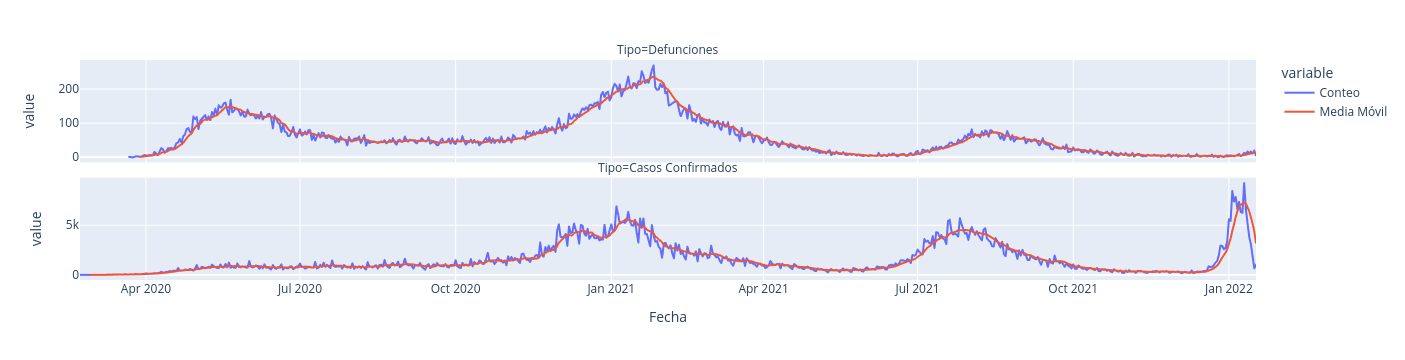

In [38]:
fig = px.line(casos_defunciones, x='Fecha', y='value', color='variable', facet_col='Tipo', facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

### Hospitalizaciones

Otra grááfica muy interesante para comprender la evolucióón de la epidemia es la de hospitalizaciones. Para obtener esta grááfica primero tenemos que seleccionar los pacientes confirmados como positivos a COVID-19 y que además fueron hospitalizados.

Los casos confirmados ya los tenemos calculados en la variable `confirmados`, entonces falta ver cómo obtener los pacientes hospitalizados 

In [22]:
confirmados.TIPO_PACIENTE.unique()

array(['AMBULATORIO', 'HOSPITALIZADO'], dtype=object)

Gracias a nuentra base aplanada es muy fácil distinguirlos, entonces sólo los tenemos que seleccionar, agregar por día y podemos hacer una gráfica como las anteriores (incluyendo la media móvil). Recordemos que confirmados estáá indexado por fecha de inicio de síntomas, entonces nuestra curva de hospitalización estará indexada por la misma fecha

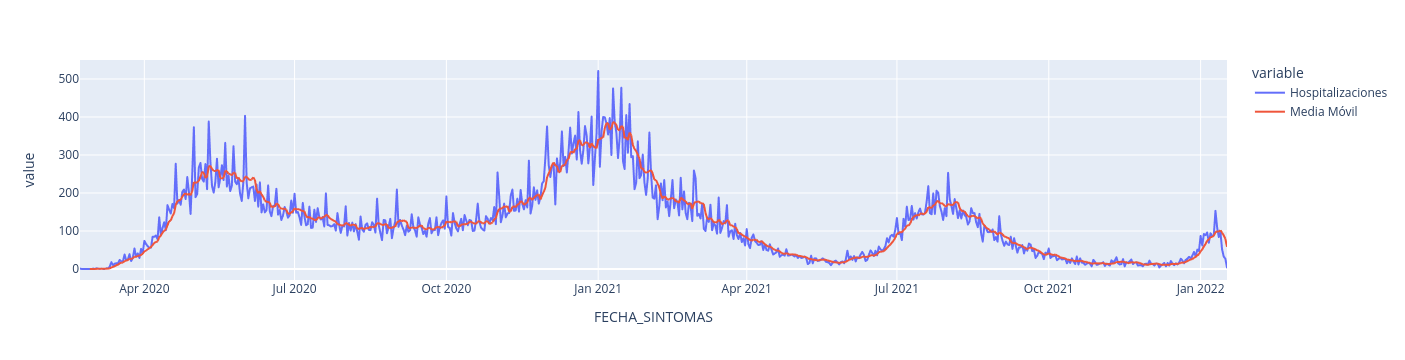

In [39]:
hospitalizados = confirmados[confirmados.TIPO_PACIENTE == 'HOSPITALIZADO']
hospitalizados_diarios = (hospitalizados
                          .groupby(pd.Grouper(freq='D'))[['ID_REGISTRO']] # grupos por dia y seleccionamos 'ID_REGISTRO'
                          .size() # Calculamos el tamaño de cada grupo
                          .reset_index() # Convertimos el resultado (que es una serie) en DataFrame
                          .rename({0:'Hospitalizaciones'}, axis=1) # Le damos nombre a la columna que obtenemos
                        )
hospitalizados_diarios['Media Móvil'] = hospitalizados_diarios.rolling(window=7).mean()
hospitalizados_diarios = hospitalizados_diarios.melt(id_vars=['FECHA_SINTOMAS'], value_vars=['Hospitalizaciones', 'Media Móvil'])
fig = px.line(hospitalizados_diarios, x='FECHA_SINTOMAS', y='value', color='variable')
fig.show()

Y, una vez más, para comparar vamos a poner las tres gráficas (casos confirmados, defunciones y hospitalizacones) en un Facet

In [40]:
hospitalizados_diarios['Tipo'] = 'Hospitalizaciones'
hospitalizados_diarios.loc[hospitalizados_diarios['variable'] == 'Hospitalizaciones', 'variable'] = 'Conteo'
hospitalizados_diarios = hospitalizados_diarios.rename({'FECHA_SINTOMAS': 'Fecha'}, axis=1)
casos_defunciones_hospitalizaciones = casos_defunciones.append(hospitalizados_diarios)
casos_defunciones_hospitalizaciones

,Fecha,variable,value,Tipo
0,2020-03-22,Conteo,1.000000,Defunciones
1,2020-03-23,Conteo,1.000000,Defunciones
2,2020-03-24,Conteo,0.000000,Defunciones
3,2020-03-25,Conteo,1.000000,Defunciones
4,2020-03-26,Conteo,3.000000,Defunciones
...,...,...,...,...
1387,2022-01-13,Media Móvil,102.000000,Hospitalizaciones
1388,2022-01-14,Media Móvil,96.000000,Hospitalizaciones
1389,2022-01-15,Media Móvil,88.285714,Hospitalizaciones
1390,2022-01-16,Media Móvil,79.571429,Hospitalizaciones


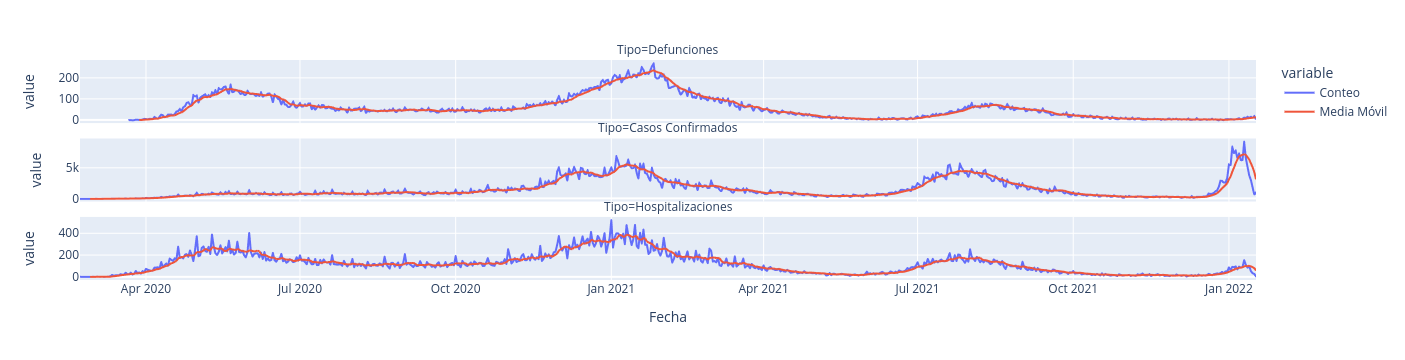

In [41]:
fig = px.line(casos_defunciones_hospitalizaciones, x='Fecha', y='value', color='variable', facet_col='Tipo', facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()